Accuracy: 0.9622857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2058
           1       0.98      0.99      0.98      2364
           2       0.95      0.96      0.96      2133
           3       0.96      0.95      0.96      2176
           4       0.96      0.96      0.96      1936
           5       0.97      0.95      0.96      1915
           6       0.97      0.98      0.97      2088
           7       0.92      0.97      0.94      2248
           8       0.97      0.95      0.96      1992
           9       0.96      0.93      0.95      2090

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000

Confusion Matrix:
[[2007    1   11    1    2    6   16    5    8    1]
 [   0 2334   11    4    2    0    1    8    3    1]
 [   3   13 2045   14    9    4    8   23   10    4]
 [   5    3 

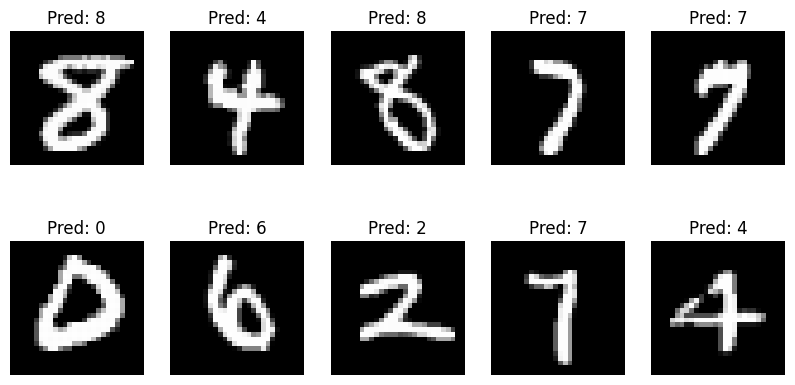

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# Split the data into features (X) and labels (y)
X = mnist.data / 255.0  # Normalize pixel values to [0, 1]
y = mnist.target.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM classifier (try different kernels: 'linear', 'rbf')
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')  # Use 'linear' or 'rbf' for different kernels
svm_classifier.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, visualize a few predicted images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()

# Convert the dataset to a DataFrame for easier handling
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target

# Show the first few rows of the dataset
print("First 5 rows of the Iris dataset:")
print(df.head())

# Step 2: Split the dataset into training and testing sets
X = df.drop('Species', axis=1)  # Features
y = df['Species']  # Target variable (species)

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of training and test sets
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Step 3: Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Step 4: Train the classifier on the training set
dt_classifier.fit(X_train, y_train)

# Step 5: Predict the species on the test set
y_pred = dt_classifier.predict(X_test)

# Step 6: Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel accuracy on the test set: {accuracy * 100:.2f}%")


First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  

Training set size: (120, 4)
Testing set size: (30, 4)

Model accuracy on the test set: 100.00%


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_diabetes

# Step 1: Load the Pima Indians Diabetes dataset
# You can use the dataset directly from a CSV file or download it from a URL
# For this exercise, let's assume you have a CSV file, or we'll simulate a dataset

# Loading dataset (For this example, we're assuming you have the dataset as a CSV file)
# If you have the dataset locally, replace the path with your actual file path
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=column_names)

# Step 2: Split the dataset into training and testing sets
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable (whether or not the patient has diabetes)

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the logistic regression model
logreg = LogisticRegression(max_iter=10000)  # Setting a high max_iter for convergence

# Train the model
logreg.fit(X_train, y_train)

# Step 4: Predict diabetes occurrence in the test set
y_pred = logreg.predict(X_test)

# Step 5: Evaluate the model using accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)



Model Accuracy: 74.68%

Confusion Matrix:
[[78 21]
 [18 37]]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9286.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           6.75e-99
Time:                        10:02:31   Log-Likelihood:                -131.66
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      98   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1728      0.181     -0.955      0.3

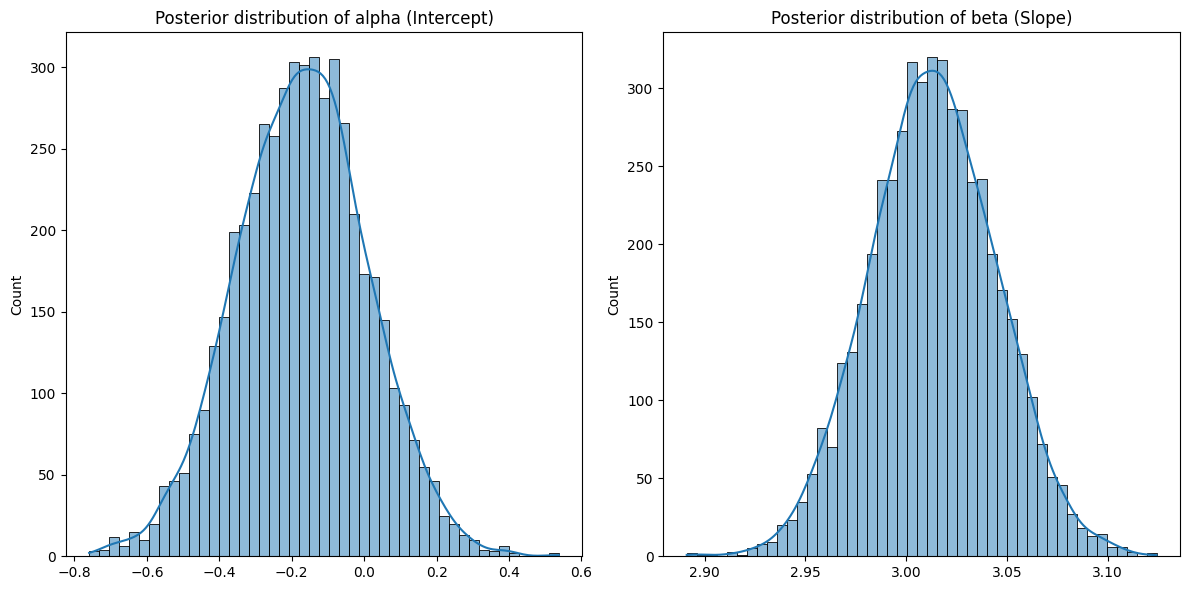

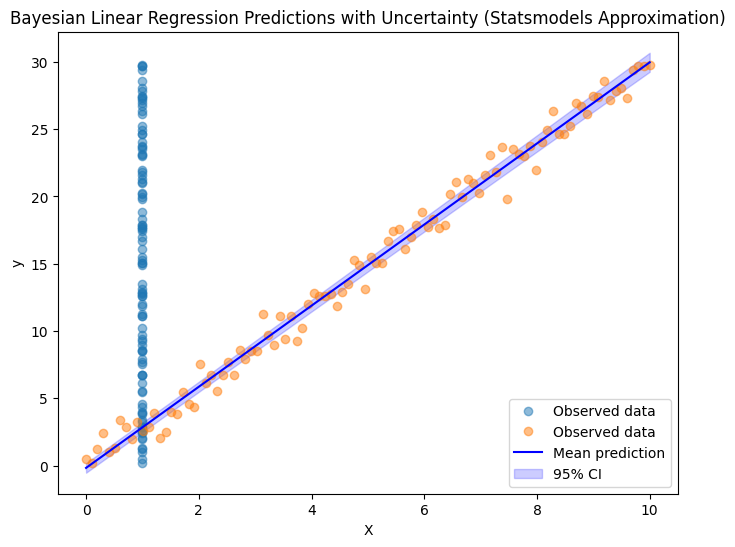

In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a synthetic dataset
np.random.seed(42)

# Generate synthetic data: y = 3x + noise
X = np.linspace(0, 10, 100)  # 100 data points from 0 to 10
noise = np.random.normal(0, 1, size=X.shape)  # Gaussian noise with mean 0 and std 1
y = 3 * X + noise  # Linear relationship with noise

# Add an intercept column to X (for the intercept term)
X = sm.add_constant(X)  # Adds a column of 1's to the X matrix for intercept

# Step 2: Fit Bayesian Linear Regression Model using statsmodels (frequentist method)
# Fit a linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary (frequentist estimates)
print(results.summary())

# Step 3: Simulate posterior distributions using Monte Carlo Sampling
# The posterior can be approximated as normal around the estimated coefficients

# Extract point estimates of the coefficients
alpha_est = results.params[0]  # Intercept estimate
beta_est = results.params[1]   # Slope estimate
sigma_est = results.bse[1]     # Standard error of the slope

# Number of samples for posterior simulation
n_samples = 5000

# Simulate posterior samples using normal distribution (approximation)
alpha_samples = np.random.normal(loc=alpha_est, scale=results.bse[0], size=n_samples)
beta_samples = np.random.normal(loc=beta_est, scale=sigma_est, size=n_samples)

# Step 4: Visualize the posterior distributions of the coefficients
plt.figure(figsize=(12, 6))

# Posterior of intercept (alpha)
plt.subplot(1, 2, 1)
sns.histplot(alpha_samples, kde=True)
plt.title('Posterior distribution of alpha (Intercept)')

# Posterior of slope (beta)
plt.subplot(1, 2, 2)
sns.histplot(beta_samples, kde=True)
plt.title('Posterior distribution of beta (Slope)')

plt.tight_layout()
plt.show()

# Step 5: Predict new data points from the posterior
X_new = np.linspace(0, 10, 100)  # New data points for prediction
X_new_const = sm.add_constant(X_new)  # Add intercept column to new X

# Predict y values by sampling from the posterior
y_pred_samples = alpha_samples[:, None] + beta_samples[:, None] * X_new

# Mean prediction and uncertainty bounds (95% credible interval)
y_pred_mean = np.mean(y_pred_samples, axis=0)
y_pred_lower = np.percentile(y_pred_samples, 2.5, axis=0)
y_pred_upper = np.percentile(y_pred_samples, 97.5, axis=0)

# Step 6: Visualize the predictions with uncertainty bounds
plt.figure(figsize=(8, 6))
plt.plot(X, y, 'o', label='Observed data', alpha=0.5)
plt.plot(X_new, y_pred_mean, label='Mean prediction', color='blue')
plt.fill_between(X_new, y_pred_lower, y_pred_upper, color='blue', alpha=0.2, label='95% CI')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Bayesian Linear Regression Predictions with Uncertainty (Statsmodels Approximation)')
plt.legend()
plt.show()


Accuracy of SVM with Linear Kernel: 97.78%
Accuracy of SVM with RBF Kernel: 97.96%


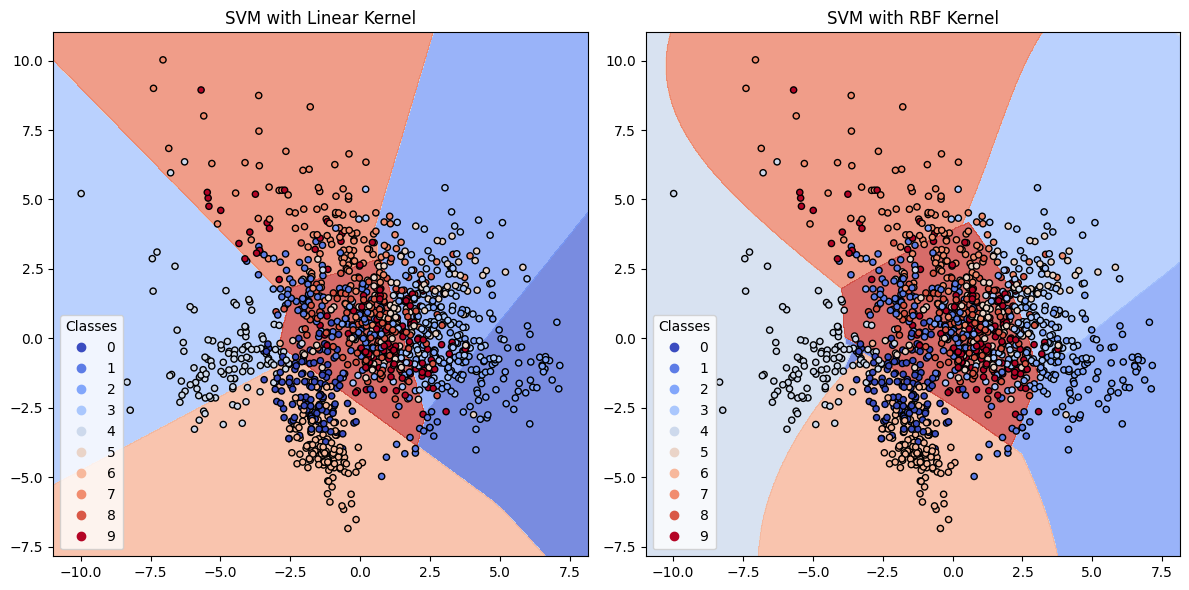

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data  # Features (64 features for 8x8 pixel values)
y = digits.target  # Labels (0 to 9)

# Step 2: Preprocess the data (split into train and test sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM classifiers with different kernels

# Linear Kernel
svm_linear = svm.SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# RBF Kernel
svm_rbf = svm.SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Step 5: Evaluate the models
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear * 100:.2f}%")
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf * 100:.2f}%")

# Step 6: Visualize the decision boundaries using PCA (Dimensionality Reduction)
# Reduce the data dimensions to 2D for visualization purposes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# **Fixing the issue**: No scaling needed, we will directly use PCA for grid points
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Plot decision boundary for Linear Kernel
Z_linear = svm_linear.predict(pca.inverse_transform(X_grid))  # Convert back to original space for prediction
Z_linear = Z_linear.reshape(xx.shape)

# Plot decision boundary for RBF Kernel
Z_rbf = svm_rbf.predict(pca.inverse_transform(X_grid))  # Convert back to original space for prediction
Z_rbf = Z_rbf.reshape(xx.shape)

# Create plots for decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Linear Kernel
axes[0].contourf(xx, yy, Z_linear, alpha=0.75, cmap=plt.cm.coolwarm)
scatter = axes[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=20)
axes[0].set_title("SVM with Linear Kernel")
axes[0].legend(*scatter.legend_elements(), title="Classes")

# Plot for RBF Kernel
axes[1].contourf(xx, yy, Z_rbf, alpha=0.75, cmap=plt.cm.coolwarm)
scatter = axes[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=20)
axes[1].set_title("SVM with RBF Kernel")
axes[1].legend(*scatter.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()









In [13]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        # Initialize weights and bias to zero
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate

    def activation(self, x):
        # Activation function (Heaviside step function)
        return 1 if x >= 0 else 0

    def predict(self, X):
        # Prediction function
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

    def train(self, X, y, epochs=10):
        # Training function
        for epoch in range(epochs):
            for i in range(len(X)):
                # Compute the output for the current input
                prediction = self.predict(X[i])

                # Update the weights and bias based on the error
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

            print(f'Epoch {epoch + 1}/{epochs} completed.')

    def evaluate(self, X, y):
        # Evaluate the model's accuracy
        correct_predictions = 0
        for i in range(len(X)):
            prediction = self.predict(X[i])
            if prediction == y[i]:
                correct_predictions += 1
        return correct_predictions / len(X)

# Example dataset (X: input data, y: labels: 1 for positive, 0 for negative)
X = np.array([[1], [2], [3], [-1], [-2], [-3]])  # Features (numbers)
y = np.array([1, 1, 1, 0, 0, 0])  # Labels (1 for positive, 0 for negative)

# Create and train the Perceptron
perceptron = Perceptron(input_size=1)
perceptron.train(X, y, epochs=20)

# Evaluate the model on the same data
accuracy = perceptron.evaluate(X, y)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Epoch 1/20 completed.
Epoch 2/20 completed.
Epoch 3/20 completed.
Epoch 4/20 completed.
Epoch 5/20 completed.
Epoch 6/20 completed.
Epoch 7/20 completed.
Epoch 8/20 completed.
Epoch 9/20 completed.
Epoch 10/20 completed.
Epoch 11/20 completed.
Epoch 12/20 completed.
Epoch 13/20 completed.
Epoch 14/20 completed.
Epoch 15/20 completed.
Epoch 16/20 completed.
Epoch 17/20 completed.
Epoch 18/20 completed.
Epoch 19/20 completed.
Epoch 20/20 completed.
Model Accuracy: 100.00%



Training with relu activation function:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8676 - loss: 0.4692 - val_accuracy: 0.9563 - val_loss: 0.1529
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9616 - loss: 0.1331 - val_accuracy: 0.9655 - val_loss: 0.1157
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9750 - loss: 0.0861 - val_accuracy: 0.9684 - val_loss: 0.1009
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9828 - loss: 0.0604 - val_accuracy: 0.9733 - val_loss: 0.0867
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9862 - loss: 0.0481 - val_accuracy: 0.9680 - val_loss: 0.1038
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9668 - loss: 0.1094
Test Accuracy with relu activation: 97.11%

Training with sigmoid activation function:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8178 - loss: 0.7277 - val_accuracy: 0.9309 - val_loss: 0.2463
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9318 - loss: 0.2346 - val_accuracy: 0.9487 - val_loss: 0.1833
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9509 - loss: 0.1692 - val_accuracy: 0.9581 - val_loss: 0.1502
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9620 - loss: 0.1304 - val_accuracy: 0.9635 - val_loss: 0.1301
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9692 - loss: 0.1069 - val_accuracy: 0.9663 - val_loss: 0.1162
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9589 - loss: 0.1306
Test Accuracy with sigmoid activation: 96.50%

Training with tanh activation function:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8614 - loss: 0.4870 - val_accuracy: 0.9438 - val_loss: 0.1946
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9527 - loss: 0.1673 - val_accuracy: 0.9600 - val_loss: 0.1349
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9690 - loss: 0.1092 - val_accuracy: 0.9637 - val_loss: 0.1188
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9782 - loss: 0.0767 - val_accuracy: 0.9702 - val_loss: 0.0979
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9831 - loss: 0.0594 - val_accuracy: 0.9703 - val_loss: 0.0973
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.0935
Test Accuracy with tanh activation: 97.42%


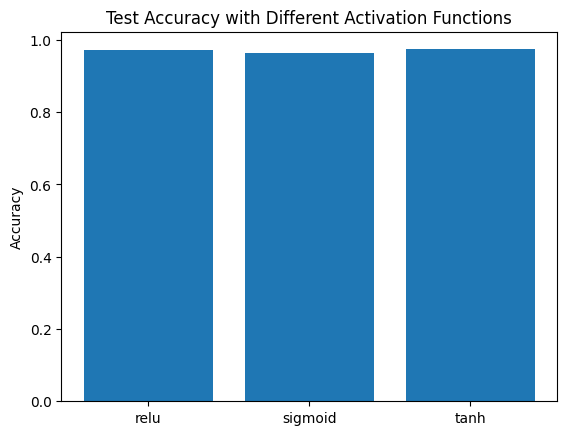

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to have values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images (28x28 pixels) into 1D vectors (784 features)
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

# One-hot encode the labels
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

# Step 2: Build a simple neural network model with 1 hidden layer
def build_model(activation_function='relu'):
    model = models.Sequential()
    model.add(layers.Dense(128, activation=activation_function, input_shape=(784,)))  # First hidden layer
    model.add(layers.Dense(10, activation='softmax'))  # Output layer (10 classes for digits 0-9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 3: Train and evaluate the model
def train_and_evaluate(activation_function='relu'):
    model = build_model(activation_function)
    model.summary()  # Display the model architecture

    # Train the model
    model.fit(X_train_flat, y_train_onehot, epochs=5, batch_size=32, validation_split=0.2)

    # Evaluate the model on test data
    test_loss, test_acc = model.evaluate(X_test_flat, y_test_onehot)
    print(f"Test Accuracy with {activation_function} activation: {test_acc * 100:.2f}%")

    return model, test_acc

# Step 4: Experiment with different activation functions
activation_functions = ['relu', 'sigmoid', 'tanh']

results = {}
for activation in activation_functions:
    print(f"\nTraining with {activation} activation function:")
    model, accuracy = train_and_evaluate(activation)
    results[activation] = accuracy

# Step 5: Visualize Results
plt.bar(results.keys(), results.values())
plt.title("Test Accuracy with Different Activation Functions")
plt.ylabel("Accuracy")
plt.show()



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

# Step 1: Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images to (28, 28, 1) to match the input format for CNNs (height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

# Step 2: Build the CNN model with dropout and L2 regularization
def build_cnn_model():
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))

    # Flatten the 3D outputs to 1D for the fully connected layers
    model.add(layers.Flatten())

    # Fully Connected Layer (Dense)
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)))

    # Dropout Layer (helps prevent overfitting)
    model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digits 0-9

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Step 3: Train and evaluate the model
def train_and_evaluate(model):
    # Split the training data into training and validation sets (80% train, 20% validation)
    X_train_split, X_val_split = X_train[:48000], X_train[48000:]
    y_train_split, y_val_split = y_train_onehot[:48000], y_train_onehot[48000:]

    # Train the model
    model.fit(X_train_split, y_train_split, epochs=10, batch_size=32, validation_data=(X_val_split, y_val_split))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test_onehot)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

    return model

# Step 4: Build and train the model
cnn_model = build_cnn_model()
cnn_model.summary()  # Show the model architecture
trained_model = train_and_evaluate(cnn_model)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.8473 - loss: 0.6868 - val_accuracy: 0.9816 - val_loss: 0.2053
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.9707 - loss: 0.2318 - val_accuracy: 0.9778 - val_loss: 0.1919
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 92s 46ms/step - accuracy: 0.9753 - loss: 0.1964 - val_accuracy: 0.9845 - val_loss: 0.1621
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 43ms/step - accuracy: 0.9786 - loss: 0.1785 - val_accuracy: 0.9846 - val_loss: 0.1483
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9803 - loss: 0.1645 - val_accuracy: 0.9793 - val_loss: 0.1575
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.9816 - loss: 0.1529 - val_accuracy: 0.9888 - val_loss: 0.1256
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 39ms/step - accuracy: 0.9824 - loss: 0.1452 - val_accuracy: 0.9874 - val_loss: 0.1287
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.9847 -

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train individual models

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 4: Create a Stacked Model (using Logistic Regression as a meta-model)
# The base models will be Random Forest and SVM, and the meta-model will be Logistic Regression.
stacked_model = StackingClassifier(
    estimators=[('rf', rf_classifier), ('svm', svm_classifier)],
    final_estimator=LogisticRegression()
)

# Step 5: Train the Stacked Model
stacked_model.fit(X_train, y_train)

# Step 6: Evaluate the models

# Individual Model Evaluation: Random Forest
y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {rf_accuracy * 100:.2f}%")

# Individual Model Evaluation: Support Vector Machine
y_pred_svm = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {svm_accuracy * 100:.2f}%")

# Stacked Model Evaluation
y_pred_stacked = stacked_model.predict(X_test)
stacked_accuracy = accuracy_score(y_test, y_pred_stacked)
print(f"Accuracy of Stacked Model: {stacked_accuracy * 100:.2f}%")


Accuracy of Random Forest: 100.00%
Accuracy of SVM: 100.00%
Accuracy of Stacked Model: 100.00%
